In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('adult 6.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data preprocessing and EDA:

In [3]:
df.shape

(48842, 15)

In [4]:
df.describe().round()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0
mean,39.0,189664.0,10.0,1079.0,88.0,40.0
std,14.0,105604.0,3.0,7452.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117550.0,9.0,0.0,0.0,40.0
50%,37.0,178144.0,10.0,0.0,0.0,40.0
75%,48.0,237642.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


In [5]:
# Finding number of null values 
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# values with '?' sign
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
# handling missing values, replacing with 'unknown'
df = df.replace('?', 'Unknown')

In [8]:
# Check For Missing Values, duplicates and unique 
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,9,28523,16,16,7,15,6,5,2,123,99,96,42,2


In [9]:
# dropping duplicate values 
df = df.drop_duplicates()
df.shape

(48790, 15)

In [10]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

Text(0.5, 1.0, 'Histogram')

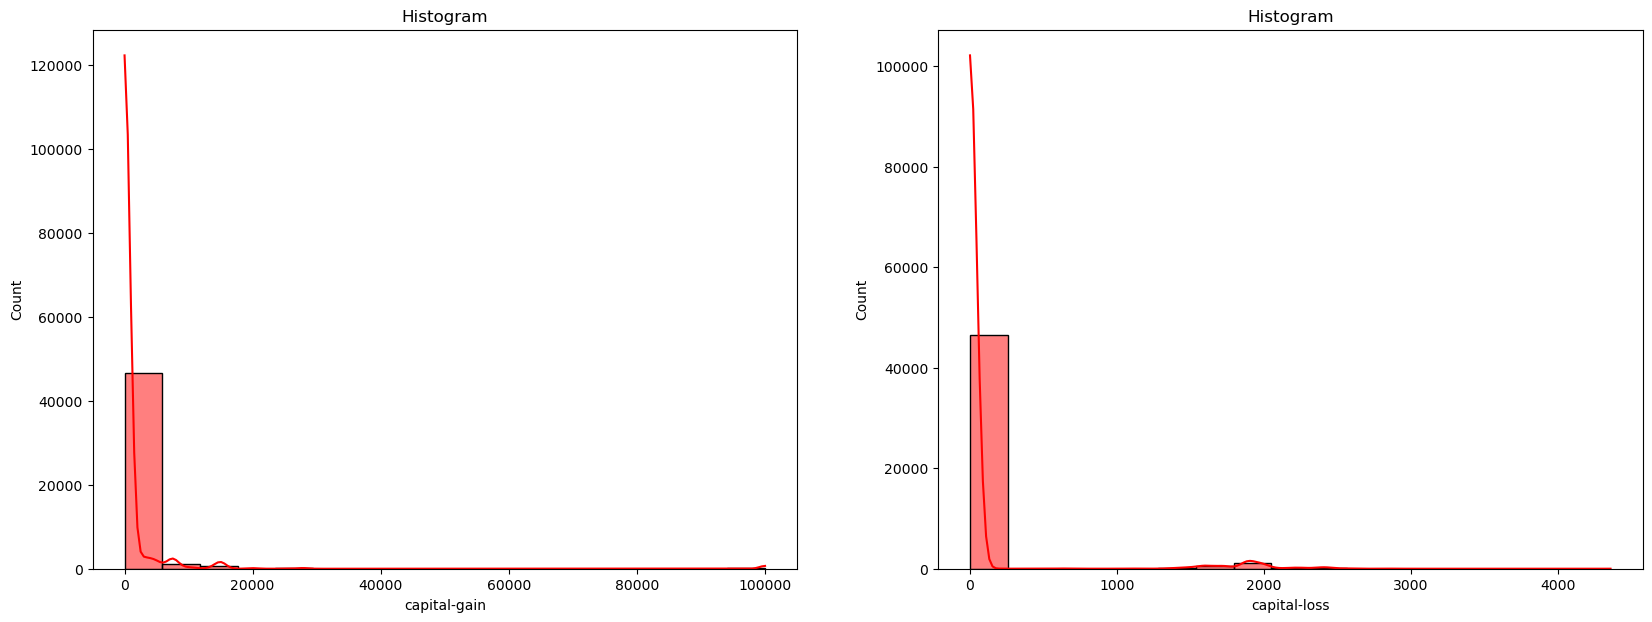

In [12]:
# Histogram distribution of capital_loss and capital_gain
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00 So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns

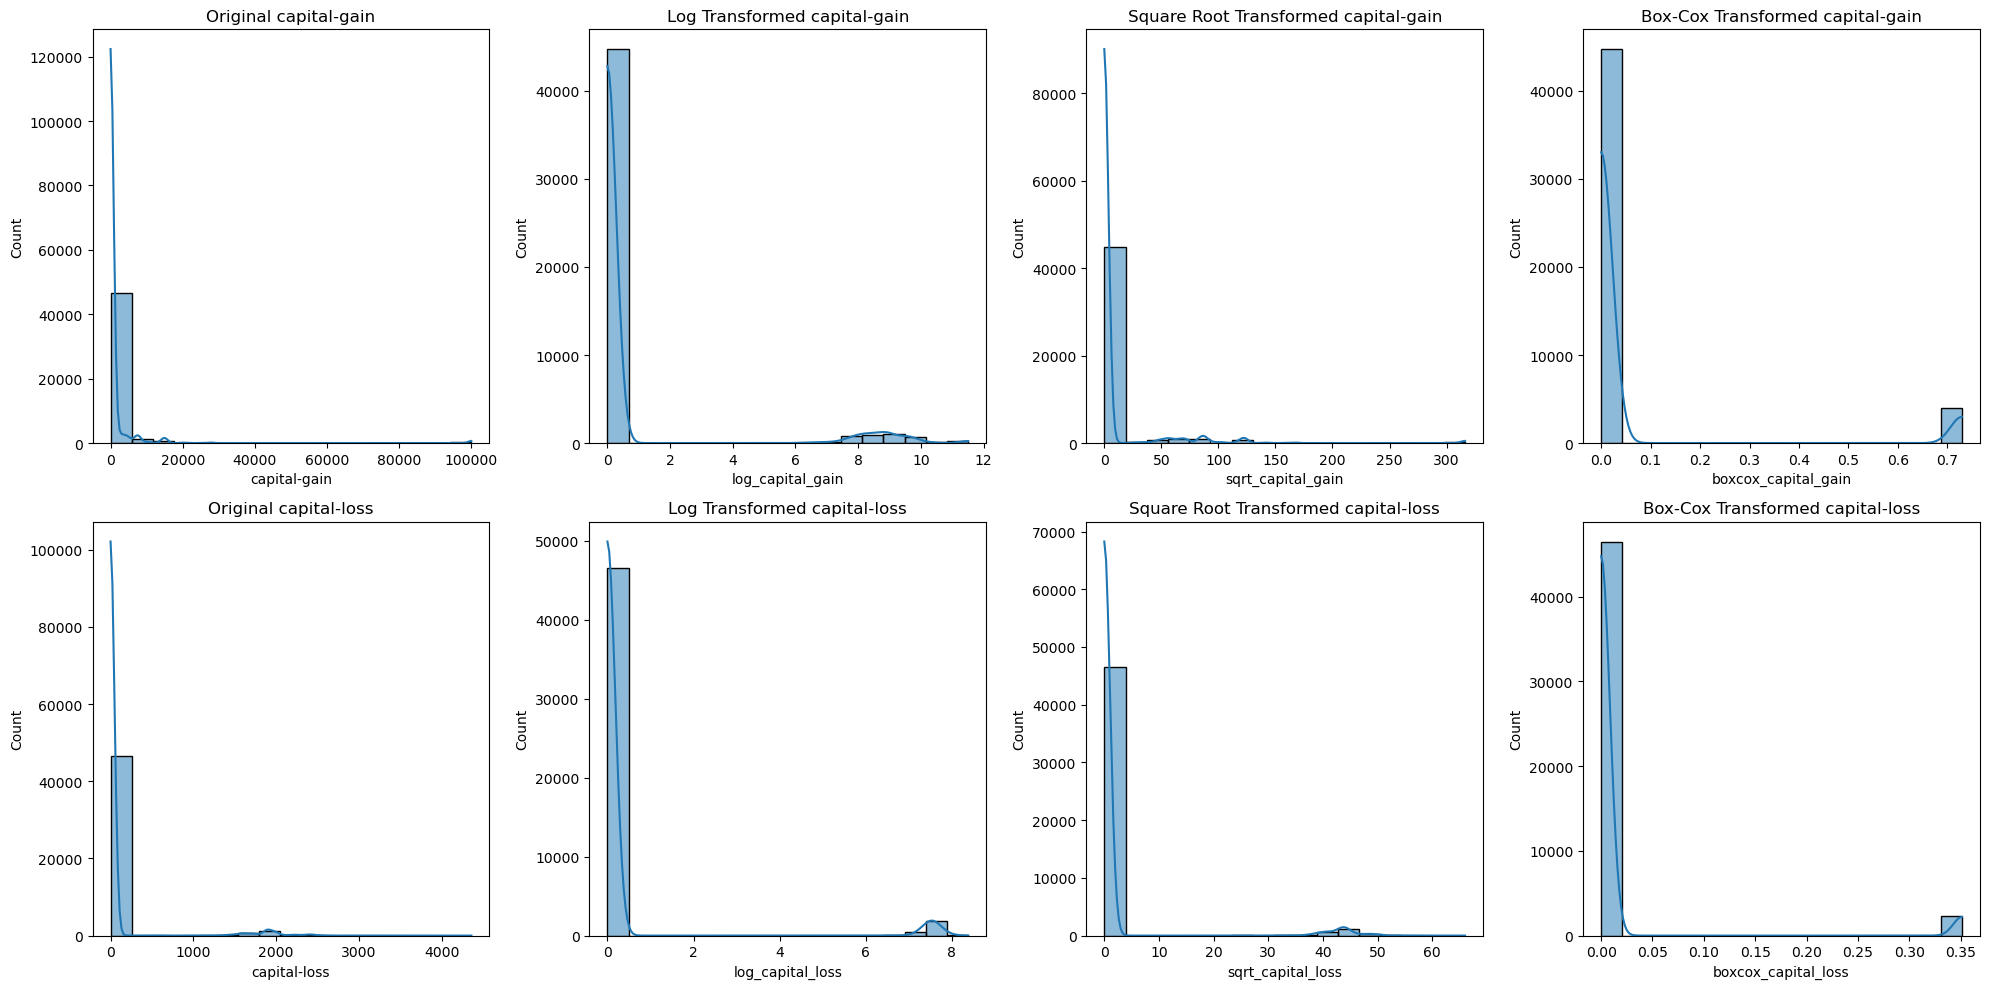

In [13]:
# Handling the skewness in capital-loss and capital-gain:

# Apply Log Transformation
df['log_capital_gain'] = np.log1p(df['capital-gain'])  # log1p handles log(0) cases
df['log_capital_loss'] = np.log1p(df['capital-loss'])

# Apply Square Root Transformation
df['sqrt_capital_gain'] = np.sqrt(df['capital-gain'])
df['sqrt_capital_loss'] = np.sqrt(df['capital-loss'])

# Apply Box-Cox Transformation (requires all positive values)
df['boxcox_capital_gain'], _ = stats.boxcox(df['capital-gain'] + 1)  # +1 to handle zeros
df['boxcox_capital_loss'], _ = stats.boxcox(df['capital-loss'] + 1)  # +1 to handle zeros

# Apply Yeo-Johnson Transformation (can handle zero and negative values)
df['yj_capital_gain'], _ = stats.yeojohnson(df['capital-gain'])
df['yj_capital_loss'], _ = stats.yeojohnson(df['capital-loss'])

# Plot the original and transformed data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(df['capital-gain'], kde=True, ax=axes[0, 0]).set_title('Original capital-gain')
sns.histplot(df['log_capital_gain'], kde=True, ax=axes[0, 1]).set_title('Log Transformed capital-gain')
sns.histplot(df['sqrt_capital_gain'], kde=True, ax=axes[0, 2]).set_title('Square Root Transformed capital-gain')
sns.histplot(df['boxcox_capital_gain'], kde=True, ax=axes[0, 3]).set_title('Box-Cox Transformed capital-gain')
sns.histplot(df['capital-loss'], kde=True, ax=axes[1, 0]).set_title('Original capital-loss')
sns.histplot(df['log_capital_loss'], kde=True, ax=axes[1, 1]).set_title('Log Transformed capital-loss')
sns.histplot(df['sqrt_capital_loss'], kde=True, ax=axes[1, 2]).set_title('Square Root Transformed capital-loss')
sns.histplot(df['boxcox_capital_loss'], kde=True, ax=axes[1, 3]).set_title('Box-Cox Transformed capital-loss')
plt.tight_layout()
plt.show()


In [14]:
# dropping unneccessary variables 
df = df.drop(['educational-num', 'capital-gain', 'capital-loss', 'log_capital_gain', 'sqrt_capital_gain', 'boxcox_capital_gain', 'yj_capital_loss', 'log_capital_loss', 'sqrt_capital_loss' ,'boxcox_capital_loss', 'yj_capital_gain'], axis=1)

In [15]:
# Count the number of samples in each income group
income_counts = df['income'].value_counts()
income_counts

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [16]:
# Balancing dataset using combination of oversampling and undersampling
#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


income  <=50K  >50K
gender             
Female  14407  1769
Male    22702  9912


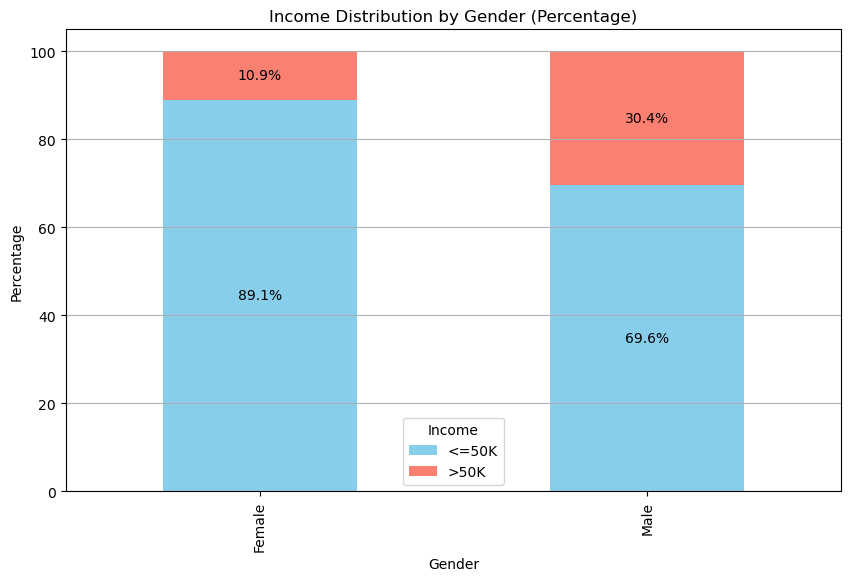

In [17]:
# To find the relationship between the sex of people and thier income class

gender_income_counts = df.groupby(['gender', 'income']).size().reset_index(name='count')
gender_income_pivot = gender_income_counts.pivot(index='gender', columns='income', values='count')
print(gender_income_pivot)

# Calculate percentages
gender_income_percentage = gender_income_pivot.div(gender_income_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = gender_income_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Income Distribution by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.grid(axis='y')

# Adding percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center')

plt.show()


In [18]:
# How many percent of people who have >50k income are native American and how many are not?


high_income = df[df['income'] == '>50K']
native_american_count = high_income[high_income['native-country'] == 'United-States'].shape[0]


total_high_income_count = high_income.shape[0]

# Calculate the percentages
native_american_percentage = (native_american_count / total_high_income_count) * 100
non_native_american_percentage = 100 - native_american_percentage

print(f"Percentage of people with >50K income who are native American: {native_american_percentage:.2f}%")
print(f"Percentage of people with >50K income who are not native American: {non_native_american_percentage:.2f}%")


Percentage of people with >50K income who are native American: 91.50%
Percentage of people with >50K income who are not native American: 8.50%


/var/folders/q0/54d0yrqj2dz0f0nfww0g5x1r0000gn/T/ipykernel_1150/127747577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income['education_level'] = high_income['education'].apply(


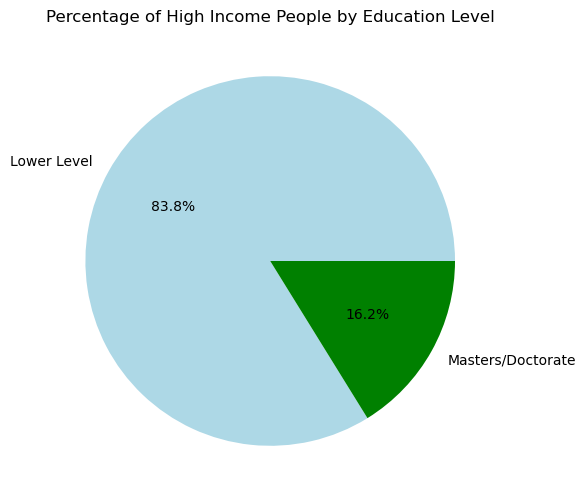

education_level
Lower Level          83.819878
Masters/Doctorate    16.180122
Name: count, dtype: float64


In [19]:
# The people with >50K income and education level of Masters or Doctorate

high_income = df[df['income'] == '>50K']

# Categorize education levels
high_income['education_level'] = high_income['education'].apply(
    lambda x: 'Masters/Doctorate' if x in ['Masters', 'Doctorate'] else 'Lower Level'
)

# Count the occurrences of each category
education_counts = high_income['education_level'].value_counts()

# Calculate the percentages
education_percentages = education_counts / education_counts.sum() * 100


plt.figure(figsize=(8, 6))
education_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'green'])
plt.title('Percentage of High Income People by Education Level')
plt.ylabel('')  
plt.show()

print(education_percentages)

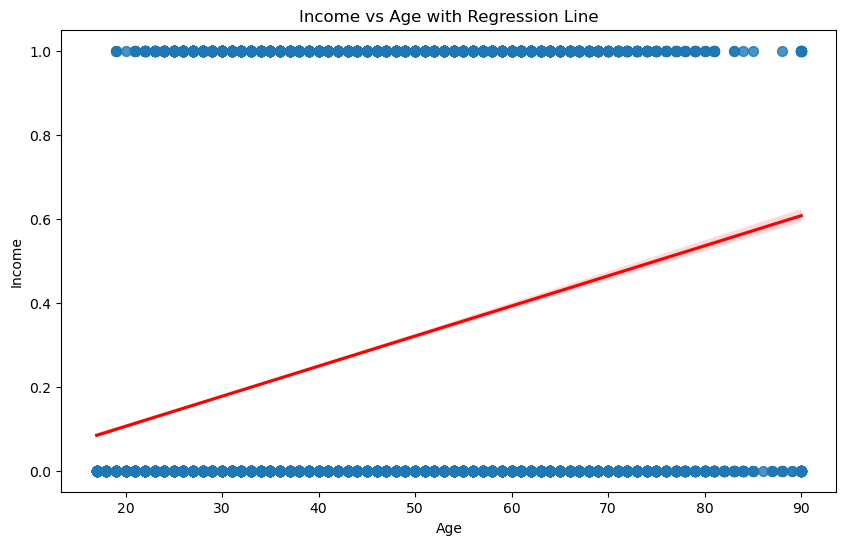

In [22]:
# how income is changed when age is higher?
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='income', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Income vs Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


This graph shows a positive relationship between age and income, suggesting that as age increases, the likelihood of having a higher income also increases. The regression line indicates a trend, but the binary nature of the income data (0 or 1) makes the relationship appear less continuous.

In [21]:
# converting categorical features to numberical/encoding using label encoding 
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])


df.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,226802,1,4,6,3,2,1,40,38,0
1,38,3,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,3,160323,15,2,6,0,2,1,40,38,1
4,18,7,103497,15,4,14,3,4,0,30,38,0


In [23]:
# Scale continuous features to have mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fnlwgt', 'hours-per-week']] = scaler.fit_transform(df[['age', 'fnlwgt', 'hours-per-week']])

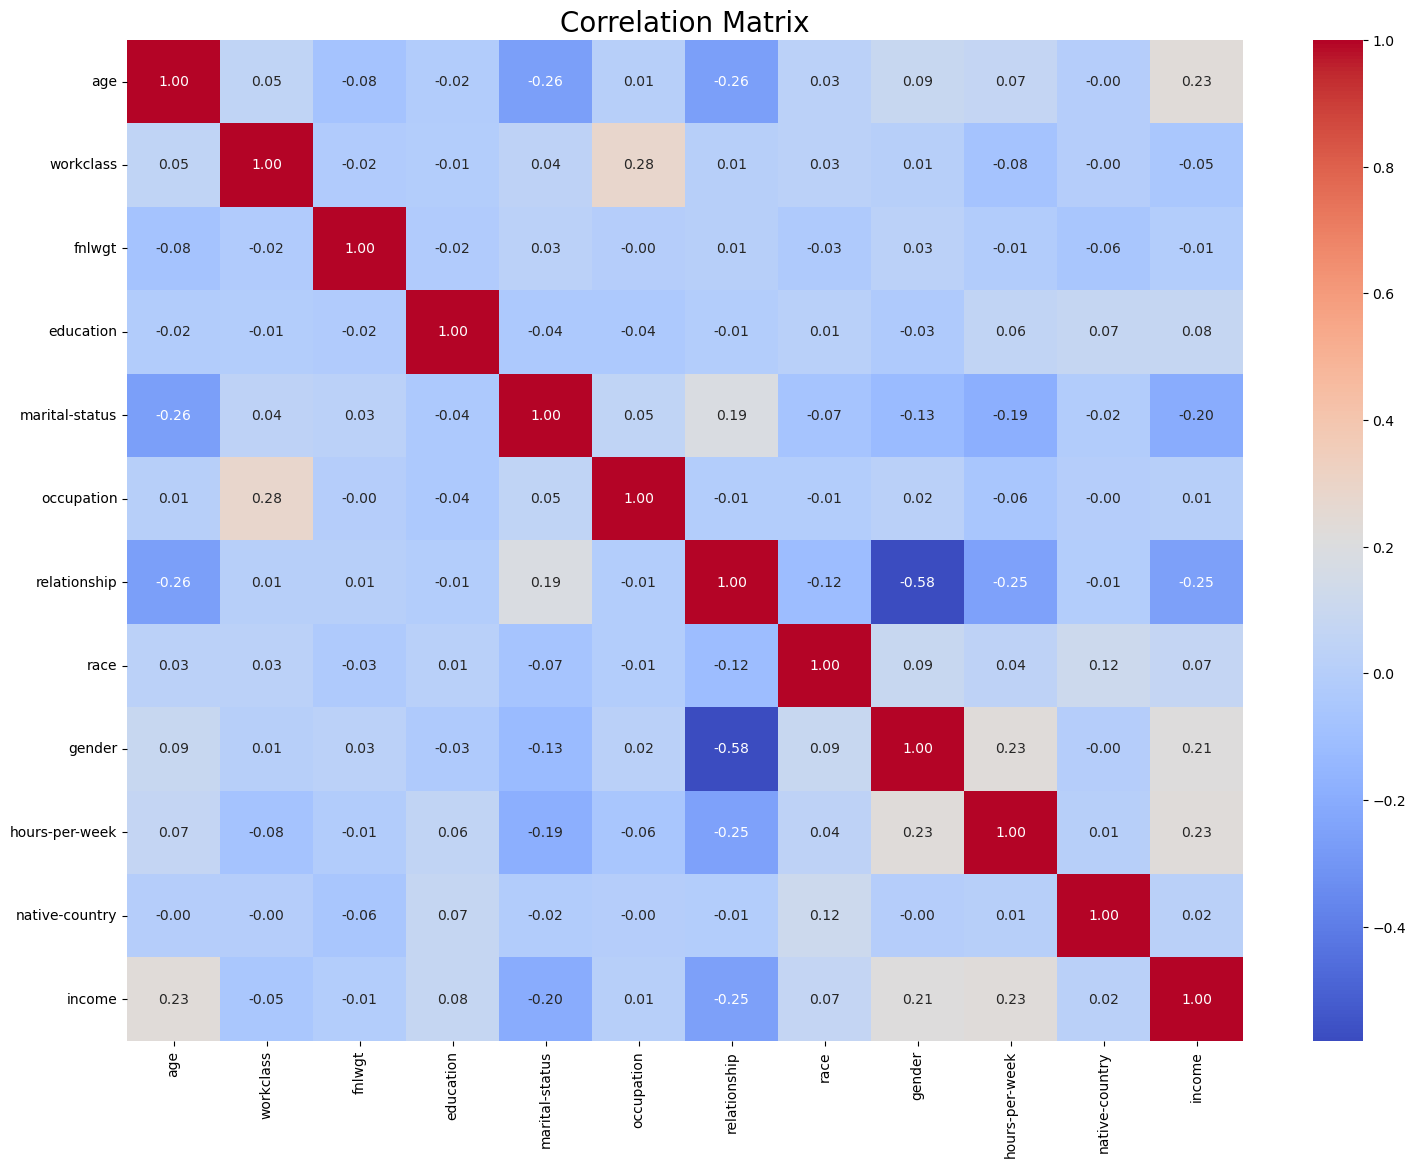

In [24]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap='coolwarm')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

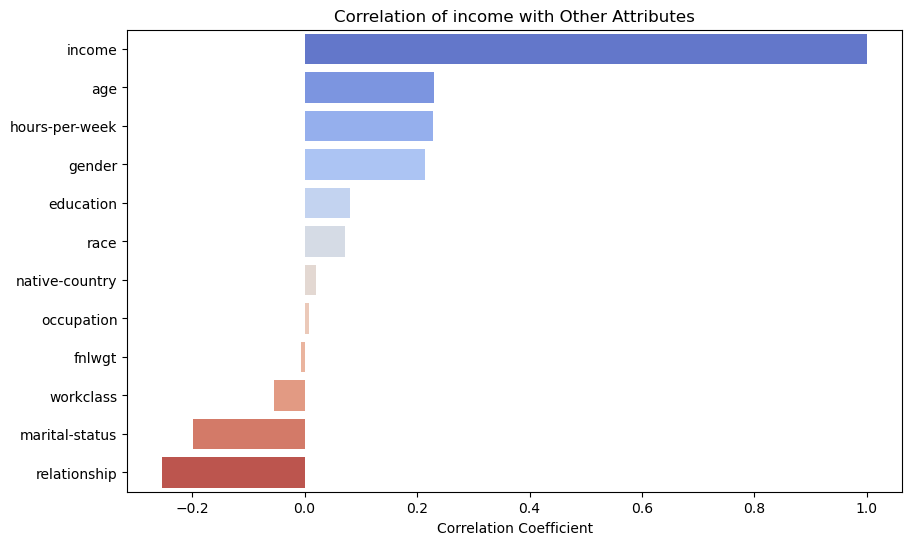

income            1.000000
age               0.230144
hours-per-week    0.227664
gender            0.214639
education         0.080118
race              0.070970
native-country    0.020169
occupation        0.007275
fnlwgt           -0.006309
workclass        -0.054634
marital-status   -0.198855
relationship     -0.253175
Name: income, dtype: float64


In [25]:
corr_matrix = df.corr()

# Specify the attribute for which you want to find correlations
attribute = 'income'

# Extract correlations for the specified attribute
correlation_with_attribute = corr_matrix[attribute].sort_values(ascending=False)

# Plot the correlations with the specified attribute
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_attribute.values, y=correlation_with_attribute.index, palette='coolwarm')
plt.title(f'Correlation of {attribute} with Other Attributes')
plt.xlabel('Correlation Coefficient')
plt.show()


print(correlation_with_attribute)

# The models:

## 1. Logistic Regression

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

X = df.drop('income', axis=1)
y = df['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100]
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=2000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for Logistic Regression:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy: 0.7660125534935652


In [44]:
# Use the best parameters to fit the model
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = best_log_reg.predict(X_test_scaled)
print("Logistic Regression with Best Parameters:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")


Logistic Regression with Best Parameters:
Accuracy: 0.77
Precision: 0.74
Recall: 0.77
F1-score: 0.73


In [45]:
# Logistic Regression without hyperparameter tuning
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("\n")

Logistic Regression:
Accuracy: 0.77
Precision: 0.74
Recall: 0.77
F1-score: 0.73




In [29]:
y_test.shape

(9758,)

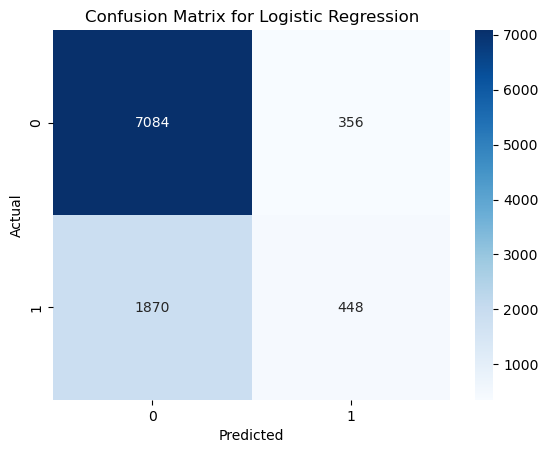

In [46]:
# Confusion Matrix for logistic regression 

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

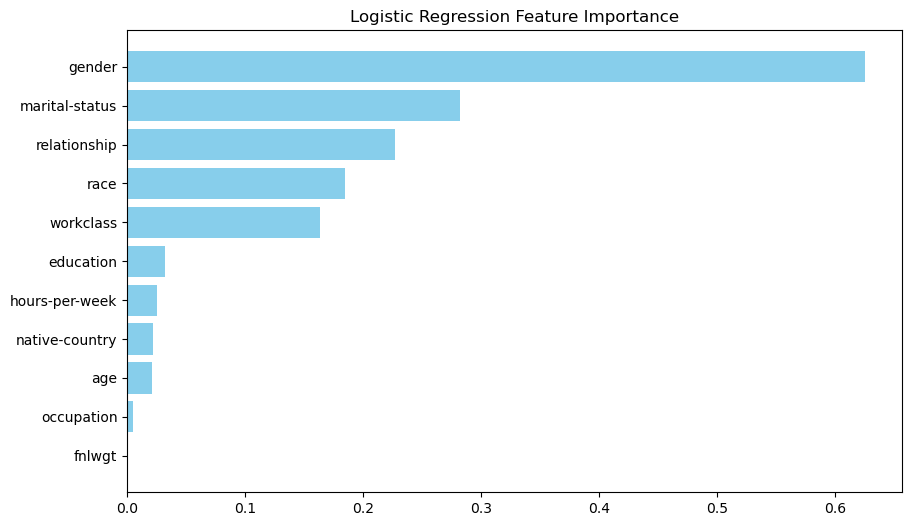

In [31]:
# Feature Importance for Logistic Regression
logistic_importance = np.abs(log_reg.coef_[0])
logistic_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': logistic_importance})
logistic_importance_df = logistic_importance_df.sort_values(by='Importance', ascending=False)

# Plot Logistic Regression Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(logistic_importance_df['Feature'], logistic_importance_df['Importance'], color='skyblue')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)
cv_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')

print(f"Decision Tree - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC Score: {roc_auc:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Decision Tree:
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1-score: 0.77
ROC-AUC Score: 0.69
Cross-Validation Accuracy: 0.77 ± 0.00




In [33]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8248872417557825


## 3. Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest.predict(X_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print("\n")


Random Forest:
Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1-score: 0.82
Cross-Validation Accuracy: 0.83 ± 0.00




In [31]:
# Hyperparameter tuning for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
# print("Best parameters for Random Forest:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best cross-validation accuracy: 0.8387733260397745


## 4. Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Evaluate the model
y_pred = gradient_boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(gradient_boosting, X, y, cv=5, scoring='accuracy')

print(f"Gradient Boosting - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Gradient Boosting - Accuracy: 0.84, Precision: 0.83, Recall: 0.84, F1-score: 0.83, Cross-Validation Accuracy: 0.84 ± 0.00


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
# print("Best parameters for Gradient Boosting:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best cross-validation accuracy: 0.841822000208003


## 5. Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm = SVC(probability=True)  # Add probability=True to enable probability estimates for ROC-AUC
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')

print(f"Support Vector Machine (SVM) - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

/Users/niloofarkarimi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   7.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=4, min

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Reduced Parameter Grid
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Randomized Search with Reduced Grid and 3-Fold CV
random_search = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=3,  # Use 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/niloofarkarimi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## 6. k-Nearest Neighbors (k-NN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Find the k with the highest cross-validation score
k_values = range(1, 30)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 18


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(f"k-Nearest Neighbors (k-NN) - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


k-Nearest Neighbors (k-NN) - Accuracy: 0.83, Precision: 0.82, Recall: 0.83, F1-score: 0.82, Cross-Validation Accuracy: 0.83 ± 0.00


In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter tuning for k-NN using RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 18],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Randomized Search
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Best parameters and best score
# print("Best parameters for k-NN:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best cross-validation accuracy: 0.826219461626786
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   1.7s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   2.2s
[CV] END ..metric=euclidean, n_neighbors=18, weights=uniform; total time=   2.4s
[CV] END ..metric=minkowski, n_neighbors=18, weights=uniform; total time=   2.4s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.8s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.5s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.6s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   2.5s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   1.9s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   1.7s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   1.

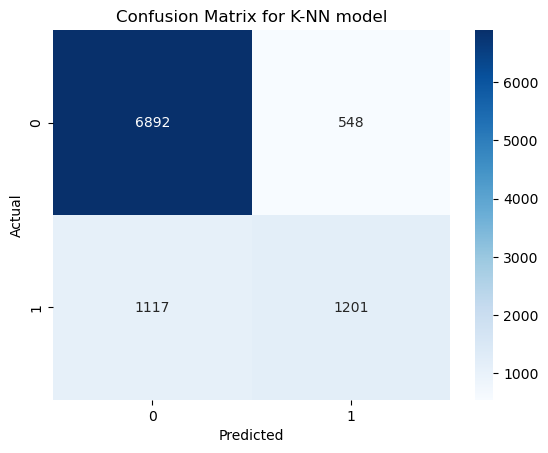

In [42]:
# Confusion Matrix for KNN

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-NN model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Neural Networks (Deep Learning)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Networks (Deep Learning)
neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(X_train, y_train)

# Evaluate the model
y_pred = neural_network.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(neural_network, X, y, cv=5, scoring='accuracy')

print(f"Neural Networks (Deep Learning) - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

In [27]:
from sklearn.neural_network import MLPClassifier
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Randomized Search
random_search = RandomizedSearchCV(
    MLPClassifier(max_iter=1000),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Neural Networks:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("Best cross-validation accuracy:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Neural Networks:
Accuracy: 0.76
Precision: 0.58
Recall: 0.76
F1-score: 0.66
Best cross-validation accuracy: 0.760119903299958


/Users/niloofarkarimi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=1.0, eta=0.1, gamma=0.1, max_depth=9, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, eta=0.3, gamma=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, eta=0.3, gamma=0.3, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, eta=0.1, gamma=0, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=1.0, eta=0.1, gamma=0, max_depth=9, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, eta=0.01, gamma=0, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, eta=0.1, gamma=0.1, max

## 8. XGBoost

In [41]:
#!pip install xgboost
from xgboost import XGBClassifier

# XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

# Evaluate the model
y_pred = xgboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(xgboost, X, y, cv=5, scoring='accuracy')

print(f"XGBoost - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

XGBoost:
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1-score: 0.84
Cross-Validation Accuracy: 0.84 ± 0.00




In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define the model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'eta': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.3]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Evaluate the model with the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("XGBoost with Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")
print("Best cross-validation accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost with Hyperparameter Tuning:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.84
ROC-AUC Score: 0.89
Best cross-validation accuracy: 0.8427956332244321


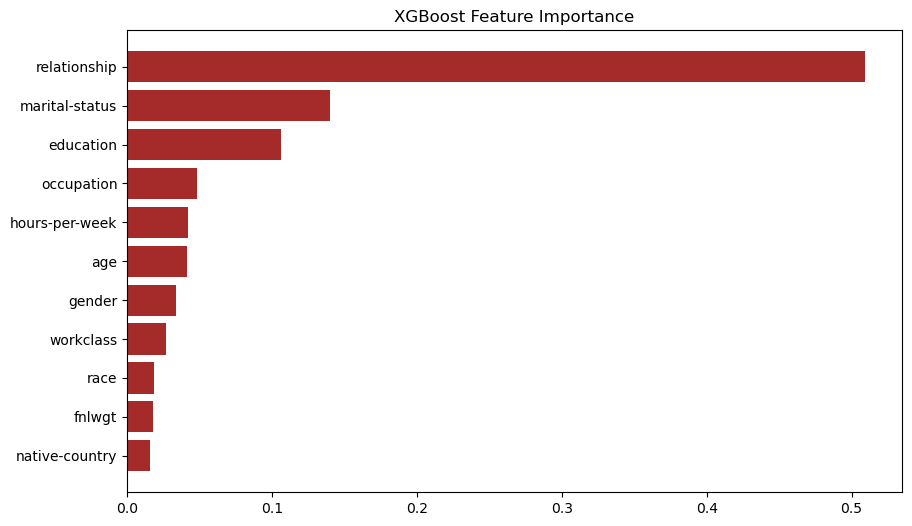

In [33]:
# Feature Importance for XGBoost
xgboost_importance = xgboost.feature_importances_
xgboost_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgboost_importance})
xgboost_importance_df = xgboost_importance_df.sort_values(by='Importance', ascending=False)

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(xgboost_importance_df['Feature'], xgboost_importance_df['Importance'], color='brown')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# models performance graph:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(kernel='linear', probability=True),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier()
}

# Store performance metrics
performance = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    performance.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        
    })

performance_df = pd.DataFrame(performance)


/Users/niloofarkarimi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


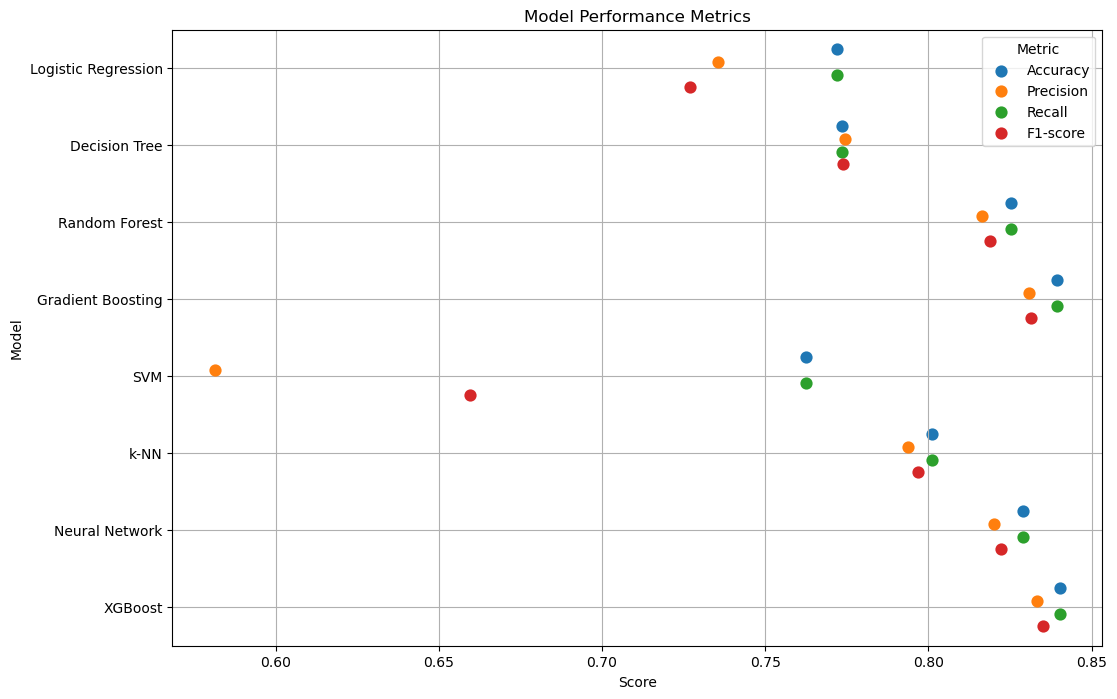

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier plotting with seaborn
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.pointplot(data=performance_melted, x='Score', y='Model', hue='Metric', join=False, dodge=0.5)
plt.title('Model Performance Metrics')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.grid(True)
plt.show()
